In [1]:
import numpy as np
import pandas as pd


In [2]:
from os import error
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4810,ham,E admin building there? I might b slightly ear...,NaN,NaN,NaN
4229,ham,And several to you sir.,NaN,NaN,NaN
5199,ham,Ugh my leg hurts. Musta overdid it on mon.,NaN,NaN,NaN
2859,ham,I want to be there so i can kiss you and feel ...,NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

#DATA Cleaning

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' ,'Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4855,ham,yes baby! I need to stretch open your pussy!
2020,ham,Anything lor but toa payoh got place 2 walk me...
2825,ham,Ok lor...
346,ham,Dis is yijue. I jus saw ur mail. In case huimi...
4137,ham,"Good! No, donï¿½ï¿½ï¿½t need any receiptsï¿½ï¿..."


In [9]:

#renaming the columns.

In [10]:
df.rename(columns={'v1':'Target','v2':'text'},inplace=True)

In [11]:
df.sample(5)

,Target,text
5264,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
5281,ham,"And how you will do that, princess? :)"
2257,ham,Here got lots of hair dresser fr china.
5242,ham,Hmm thinking lor...
3638,ham,Wat's da model num of ur phone?


In [12]:
#apply labelled encoder.

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [14]:
df['Target']=encoder.fit_transform(df['Target'])

In [15]:
df.sample(5)

,Target,text
556,0,Having lunch:)you are not in online?why?
381,0,"Yeah sure, give me a couple minutes to track d..."
4112,0,Thought we could go out for dinner. I'll treat...
4478,0,Erutupalam thandiyachu
1723,0,"Hi Jon, Pete here, Ive bin 2 Spain recently & ..."


In [16]:
# check missing value.

In [17]:
df.isnull().sum()

Target    0
text      0
dtype: int64

In [18]:
#check for duplicates value.
df.duplicated().sum()

403

In [19]:
#remove the duplicate value.

In [20]:
df=df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape


(5169, 2)



#EDA

In [23]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [25]:
import matplotlib.pyplot as plt

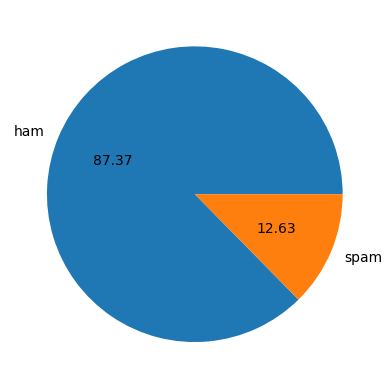

In [26]:

from enum import auto
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [27]:
#means data is inbalence because spam is less tocompire to ham.

In [28]:
#natural language tool kit lib
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_character']=df['text'].apply(len)

In [30]:
df.head()

,Target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#number of word.

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:

df.head()

,Target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_character','num_words','num_sentences']].describe()



,num_character,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [36]:
#ham message.
df[df['Target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#spam message.
df[df['Target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

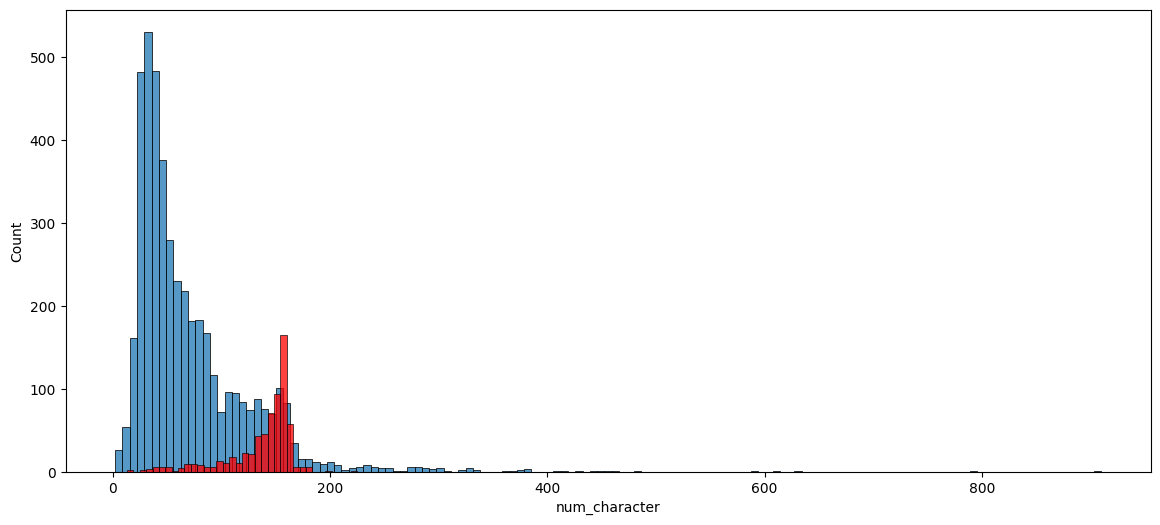

In [39]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target']==0]['num_character'])
sns.histplot(df[df['Target']==1]['num_character'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

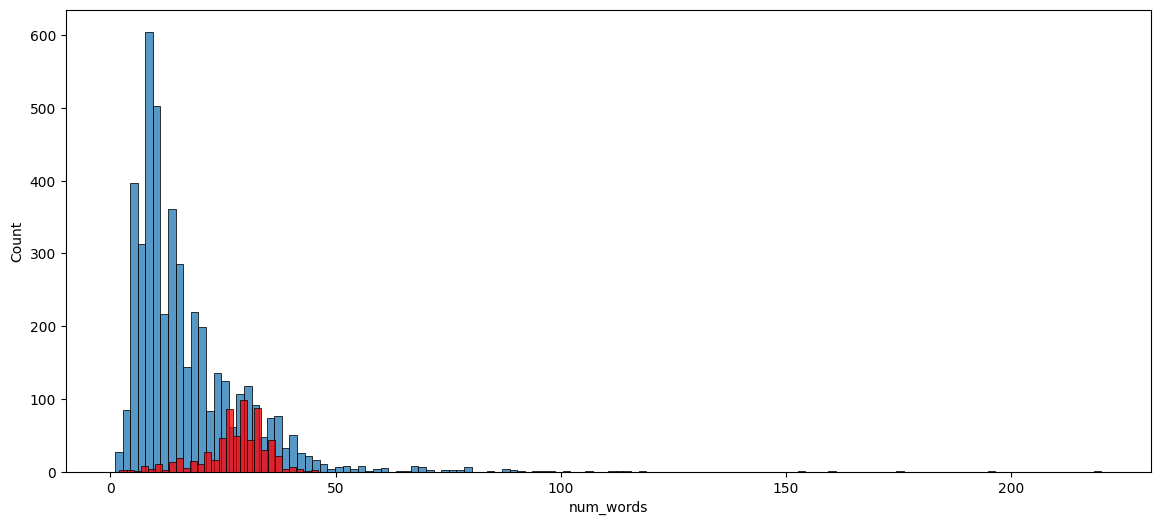

In [40]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')


<Axes: xlabel='num_sentences', ylabel='Count'>

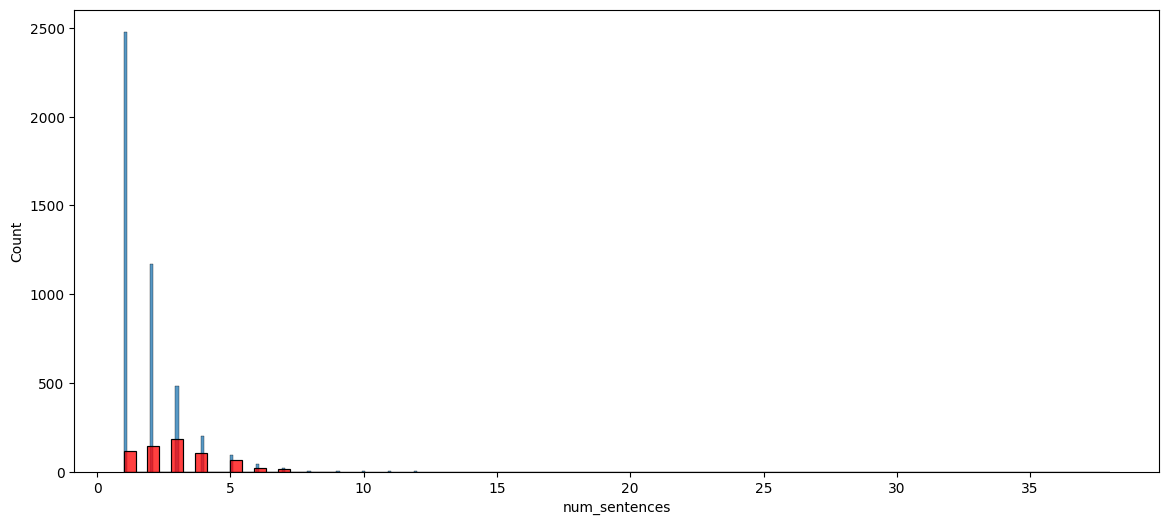

In [41]:
plt.figure(figsize=(14,6))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')


In [ ]:
sns.pairplot(df,hue='Target')

In [ ]:
sns.heatmap(df.corr(),annot=True)

Data Preprocessing




In [ ]:
#Lower case
#Tokenization -->(TO breaks into the worlds)
#Removing special characters.
#Removing stop words and punctuation.(stop words is sentence creation.)
#Stemming


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
nltk.download('punkt')

In [ ]:
import re

In [ ]:

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]   #cloning
  y.clear()


  for i in text:
    if i not in stopwords.words('english') :
      y.append(i)

  text=y[:]   #cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

corpus=input("Enter the paragraph")
transform_text(corpus)



In [ ]:
#transform_text('HI my name is surya')
#transform_text('HI my name is surya')
#transform_text('HI my name%% is Aryan')
transform_text('did you like my presentation surya')

In [ ]:
#stop words work is sentence formation.

#punctuation-->
#import string
#string.punctuation

In [ ]:
#Stemming

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('goes')

In [ ]:
transform_text('my name is surya pratap . i am from lucknow.')

In [ ]:
df['text'][10]

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head(4)

In [ ]:
#formed word cloud(imortant words of ham and spam in view in large size)

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

In [ ]:
#Top 30 words used in spam and ham.

In [ ]:
spam_corpus=[]
for message in df[df['Target']==1]['transformed_text'].tolist():
  for word in message.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
#Counter(spam_corpus)
#Counter(spam_corpus).most_common(30)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for message in df[df['Target']==0]['transformed_text'].tolist():
  for word in message.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Model Building.




In [ ]:
#vectorize the data
#A sparse array is an array of data in which many elements have a value of zero.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
#tf=TfidfVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [ ]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#convert dense array.
X

In [ ]:
X.shape

In [ ]:
y=df['Target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gau=GaussianNB()
ber=BernoulliNB()
mul=MultinomialNB()

In [ ]:

gau.fit(X_train,y_train)
y_pd1=gau.predict(X_test)
print(accuracy_score(y_test,y_pd1))
print(confusion_matrix(y_test,y_pd1))
print(precision_score(y_test,y_pd1))

In [ ]:
mul.fit(X_train,y_train)
y_pd1=mul.predict(X_test)
print(accuracy_score(y_test,y_pd1))
print(confusion_matrix(y_test,y_pd1))
print(precision_score(y_test,y_pd1))

In [ ]:
ber.fit(X_train,y_train)
y_pd1=ber.predict(X_test)
print(accuracy_score(y_test,y_pd1))
print(confusion_matrix(y_test,y_pd1))
print(precision_score(y_test,y_pd1))

In [ ]:
#conclusion -->chose TfidfVectorizer and MultinomialNB

In [ ]:
 from sklearn.svm import SVC
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.ensemble import AdaBoostClassifier
 from sklearn.ensemble import BaggingClassifier
 from sklearn.ensemble import ExtraTreesClassifier
 from sklearn.ensemble import GradientBoostingClassifier
 from xgboost import XGBClassifier

In [ ]:
svc =SVC(kernel='sigmoid',gamma=1.0)
knc =KNeighborsClassifier()
mul =MultinomialNB()
dtc =DecisionTreeClassifier(max_depth=4)
rfc =RandomForestClassifier(n_estimators=50,random_state=2)
abc =AdaBoostClassifier(n_estimators=50,random_state=2)
bagc =BaggingClassifier(n_estimators=50,random_state=2)
etc =ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgbc =XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs ={
    'SVC':svc,
    'KNC':knc,
    'MNB':mul,
    'DTC':dtc,
    'RFC':rfc,
    'Adaboost':abc,
    'BaggingC':bagc,
    'ExtraTreeC':etc,
    'GradientBoostingC':gbc,
    'XGBClassifier':xgbc
 }

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):   #clf=classifier
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy, precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

In [ ]:
accuracy_scores= []
precision_scores= []
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),
'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [ ]:
performance_df1

In [ ]:

sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model improvement.
#(1):change the max_features parameter of Tfidf

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))